In [5]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg
import scipy.spatial.distance as dt
import scipy.stats as stats

group_means = np.array([[-6.0, -1.0],
                        [-3.0, +2.0],
                        [+3.0, +2.0],
                        [+6.0, -1.0]])

group_covariances = np.array([[[+0.4, +0.0],
                               [+0.0, +4.0]],
                              [[+2.4, -2.0],
                               [-2.0, +2.4]],
                              [[+2.4, +2.0],
                               [+2.0, +2.4]],
                              [[+0.4, +0.0],
                               [+0.0, +4.0]]])

# read data into memory
data_set = np.genfromtxt("hw05_data_set.csv", delimiter = ",")

# get X values
X = data_set[:, [0, 1]]

# set number of clusters
K = 4

In [8]:
# STEP 2
# should return initial parameter estimates
# as described in the homework description
def initialize_parameters(X, K):
    # your implementation starts below
    means = np.genfromtxt("hw05_initial_centroids.csv", delimiter = ",")
    D = dt.cdist(means, X)
    memberships = np.argmin(D, axis=0)
    priors = np.asarray([np.mean(memberships==k) for k in range(K)])
    covariances = np.asarray([np.cov(X[memberships == k].T) for k in range(K)])
    # your implementation ends above
    return(means, covariances, priors)

means, covariances, priors = initialize_parameters(X, K)

In [9]:
"""
def update_memberships(X, memberships, means):
    D = dt.cdist(means, X)
    memberships = np.argmin(D, axis=0)
    return memberships
    
def update_H(X, H, means, covariances, K):
    N = X[:, 0].size
    for i in range(N):
        for k in range(K):
            mixt_density = stats.multivariate_normal.pdf(X[i] , means[k].T, covariances[k])
            H[i][k] = mixt_density * priors[k]
    
            denom = np.sum([stats.multivariate_normal.pdf(X[i] , means[c].T, covariances[c]) * priors[c] for c in range(K)])
            H[i][k] /= denom

    return H

def update_priors(priors, H, K):
    N = X[:, 0].size
    priors = np.asarray([np.sum(H[:, k]) / N for k in range(K)])
    return priors

def update_means(means, H, X, K):
    N = X[:, 0].size
    for k in range(K):
        means[k] = np.sum([H[i, k] * X[i] for i in range(N)], axis=0) / np.sum(H[:, k])
    return means

def update_covariances(covariances, means, H, X, K):
    N = X[:, 0].size
    for k in range(K):
        covariances[k] = np.sum([H[i, k] * np.matmul((X[i] - means[k])[:, None], (X[i] - means[k])[:, None].T) for i in range(N)], axis=0) / np.sum(H[:, k])
    return covariances

def iteration(means, covariances, priors, H, X, K):
    N = X[:, 0].size

    # E Step
    H = update_H(X, H, means, covariances, K)

    # M Step
    priors = update_priors(priors, H, K)
    means = update_means(means, H, X, K)
    covariances = update_covariances(covariances, means, H, X, K)

    return (means, covariances, priors, H)
"""

'\ndef update_memberships(X, memberships, means):\n    D = dt.cdist(means, X)\n    memberships = np.argmin(D, axis=0)\n    return memberships\n    \ndef update_H(X, H, means, covariances, K):\n    N = X[:, 0].size\n    for i in range(N):\n        for k in range(K):\n            mixt_density = stats.multivariate_normal.pdf(X[i] , means[k].T, covariances[k])\n            H[i][k] = mixt_density * priors[k]\n    \n            denom = np.sum([stats.multivariate_normal.pdf(X[i] , means[c].T, covariances[c]) * priors[c] for c in range(K)])\n            H[i][k] /= denom\n\n    return H\n\ndef update_priors(priors, H, K):\n    N = X[:, 0].size\n    priors = np.asarray([np.sum(H[:, k]) / N for k in range(K)])\n    return priors\n\ndef update_means(means, H, X, K):\n    N = X[:, 0].size\n    for k in range(K):\n        means[k] = np.sum([H[i, k] * X[i] for i in range(N)], axis=0) / np.sum(H[:, k])\n    return means\n\ndef update_covariances(covariances, means, H, X, K):\n    N = X[:, 0].size\n   

In [15]:
# STEP 3
# should return final parameter estimates of
# EM clustering algorithm
def em_clustering_algorithm(X, K, means, covariances, priors):
    # your implementation starts below
    n = np.shape(X)[0]
    H = np.zeros(shape=(n,K))

    for iteration in range(100):
        print(iteration)
        for i in range(n):
            for k in range(K):
                numerator = stats.multivariate_normal.pdf(X[i], mean = means[k], cov=covariances[k]) * priors[k]
                denominator = 0
                for c in range(K):
                    denominator += stats.multivariate_normal.pdf(X[i], mean = means[c], cov=covariances[c]) * priors[c]
                H[i, k] = numerator / denominator


        for k in range(K):
            priors[k] = np.sum(H[:, k]) / n
            means[k] = np.dot(H[:, k], X) / np.sum(H[:, k])
            covariance_denominator = 0
            covariance_numerator = np.zeros(shape=(2,2))
            for i in range(n):
                X_demeaned = X[i] - means[k]
                covariance_numerator += H[i, k] * np.outer(X_demeaned, X_demeaned)
                covariance_denominator += H[i, k]
            covariances[k] = covariance_numerator / covariance_denominator

    #assignments = memberships(X, means)
    D = dt.cdist(means, X)
    assignments = np.argmin(D, axis=0)
    # your implementation ends above
    return(means, covariances, priors, assignments)

means, covariances, priors, assignments = em_clustering_algorithm(X, K, means, covariances, priors)
print(means)
print(priors)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[[-6.04008414 -0.99017705]
 [-2.84646474  1.92541135]
 [ 5.93045701 -1.1106533 ]
 [ 3.14181338  2.14469912]]
[0.25421917 0.26069595 0.24900801 0.23607687]


In [16]:
"""cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00"])

plt.figure(figsize=(8, 8))
for c in range(K):
    plt.plot(X[assignments == c, 0], X[assignments == c, 1], ".", markersize = 10,
                     color = cluster_colors[c])

x1_interval = np.arange(-8, +8, 0.01)
x2_interval = np.arange(-8, +8, 0.01)
x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
coords = np.empty(x1_grid.shape + (2,))                
coords[:, :, 0] = x1_grid
coords[:, :, 1] = x2_grid 

for c in range(K):
    density = stats.multivariate_normal.pdf(coords,group_means[c], group_covariances[c])
    plt.contour(x1_grid, x2_grid,density, 1, colors="#000000",levels=[0.01] ,linestyles='dashed') 

    predicted_density = stats.multivariate_normal.pdf(coords,np.reshape(means[c], (2,)), covariances[c])
    plt.contour(x1_grid, x2_grid,predicted_density, 1, colors=cluster_colors[c],levels=[0.01]) """

'cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00"])\n\nplt.figure(figsize=(8, 8))\nfor c in range(K):\n    plt.plot(X[assignments == c, 0], X[assignments == c, 1], ".", markersize = 10,\n                     color = cluster_colors[c])\n\nx1_interval = np.arange(-8, +8, 0.01)\nx2_interval = np.arange(-8, +8, 0.01)\nx1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)\ncoords = np.empty(x1_grid.shape + (2,))                \ncoords[:, :, 0] = x1_grid\ncoords[:, :, 1] = x2_grid \n\nfor c in range(K):\n    density = stats.multivariate_normal.pdf(coords,group_means[c], group_covariances[c])\n    plt.contour(x1_grid, x2_grid,density, 1, colors="#000000",levels=[0.01] ,linestyles=\'dashed\') \n\n    predicted_density = stats.multivariate_normal.pdf(coords,np.reshape(means[c], (2,)), covariances[c])\n    plt.contour(x1_grid, x2_grid,predicted_density, 1, colors=cluster_colors[c],levels=[0.01]) '

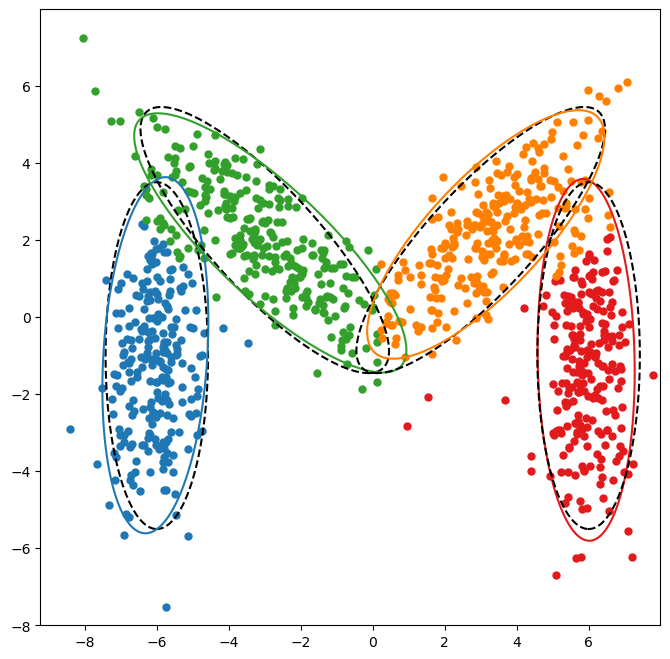

In [17]:
# STEP 4
# should draw EM clustering results as described
# in the homework description
def draw_clustering_results(X, K, group_means, group_covariances, means, covariances, assignments):
    # your implementation starts below
    cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00"])
    
    plt.figure(figsize=(8, 8))
    for c in range(K):
        plt.plot(X[assignments == c, 0], X[assignments == c, 1], ".", markersize = 10,
                         color = cluster_colors[c])
    
    x1_interval = np.arange(-8, +8, 0.01)
    x2_interval = np.arange(-8, +8, 0.01)
    x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
    coords = np.empty(x1_grid.shape + (2,))                
    coords[:, :, 0] = x1_grid
    coords[:, :, 1] = x2_grid 
    
    for c in range(K):
        density = stats.multivariate_normal.pdf(coords,group_means[c], group_covariances[c])
        plt.contour(x1_grid, x2_grid,density, 1, colors="#000000",levels=[0.01] ,linestyles='dashed') 
    
        predicted_density = stats.multivariate_normal.pdf(coords,np.reshape(means[c], (2,)), covariances[c])
        plt.contour(x1_grid, x2_grid,predicted_density, 1, colors=cluster_colors[c],levels=[0.01]) 
    # your implementation ends above
    
draw_clustering_results(X, K, group_means, group_covariances, means, covariances, assignments)